# Anamoly detection

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from utils import *

In [2]:
X_train, X_val, y_val = load_data()

In [3]:
print(f"The shape of X_train: {X_train.shape}")
print(f"The shape of X_val: {X_val.shape}")
print(f"The shape of y_val: {y_val.shape}")

The shape of X_train: (307, 2)
The shape of X_val: (307, 2)
The shape of y_val: (307,)


In [6]:
print(f"The first row of X_train: {X_train[0, :]}")
print(f"The first row of X_val: {X_val[0, :]}")
print(f"The first row of y_val: {y_val[0]}")

The first row of X_train: [13.04681517 14.74115241]
The first row of X_val: [15.79025979 14.9210243 ]
The first row of y_val: 0


In [13]:
print(f"The total no. of anomalies in the X_val dataset are: {len(y_val[y_val == 0])}")

The total no. of anomalies in the X_val dataset are: 298


## Visualize your dataset

In [14]:
plt.style.use("bmh")

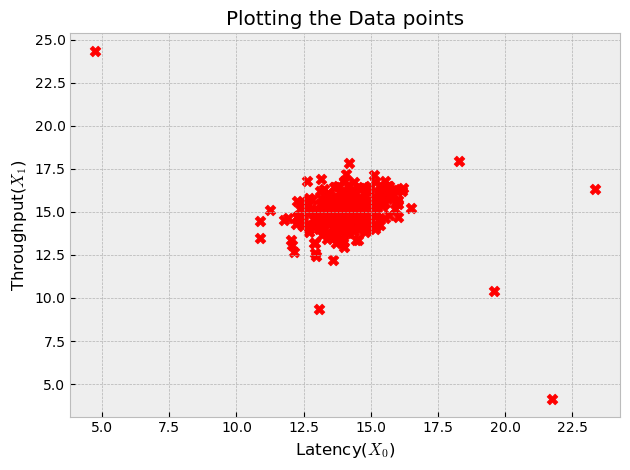

In [16]:
fig, ax = plt.subplots(1, 1)

ax.scatter(X_train[:, 0], X_train[:, 1], marker="X", c="r", s=60)
ax.set_xlabel("Latency($X_0$)")
ax.set_ylabel("Throughput($X_1$)")
ax.set_title("Plotting the Data points")
plt.tight_layout()
plt.show()

(array([[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  2.,  1.,  1.,  5., 10., 19., 40., 42., 59., 48.,
         26., 24., 14., 10.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
          0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
          0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  3., 12., 12., 25., 50.,
         52., 42., 50., 25., 19.,  7.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]]),
 array([ 4.12623222,  4.53071572,  4.93519923,  5.33968273,  5.74416623,
         6.14864973,  6.55313323,  6.95761673,  7.36210023,  7.76658373,
         8.17106723,  8.57555073,  8.98003423,  9.38451773,  9.78900123,
        10.19348473, 10.59796823, 11.00245173, 11.40693523, 11.81141873,
        12.21590223, 12.62038573, 13.02486923, 13.42935274, 13.83383624,
        14.23831974, 14.64280324, 15.04728674, 15.45177024,

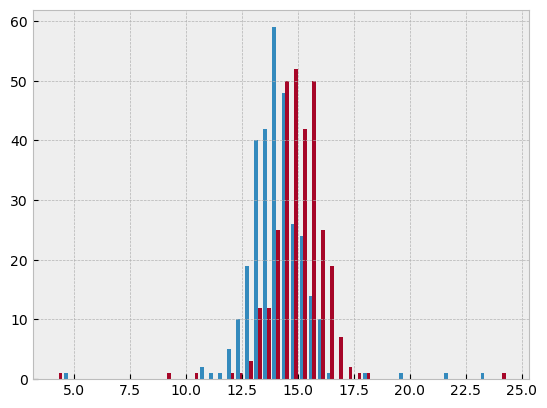

In [19]:
plt.hist(X_train, bins=50)

### Below is a function `estimate_gaussian` which take the features as input and output the The parameters required for computation of gaussian distributation such as $\mu_k$ and $\sigma^{2}$  
where $\mu_k$ is the mean and $\sigma^{2}$ is the variance  
$$\mu_i = \frac{1}{m} \sum_{j=1}^m x_i^{(j)}$$

and for the variance you will use:
$$\sigma_i^2 = \frac{1}{m} \sum_{j=1}^m (x_i^{(j)} - \mu_i)^2$$
$$
^2$$

In [20]:
def estimate_gaussian(X):
    mu = np.mean(X, axis = 0)
    var = np.mean((X - mu) ** 2, axis = 0)

    return mu, var

In [22]:
# Estimate mean and variance of each feature
mu, var = estimate_gaussian(X_train)              

print("Mean of each feature:", mu)
print("Variance of each feature:", var)

Mean of each feature: [14.11222578 14.99771051]
Variance of each feature: [1.83263141 1.70974533]


## Write the function `gaussian_distribution` which will give the probability of a data point being anomaly or not  
 $$ p(x ; \mu,\sigma ^2) = \frac{1}{\sqrt{2 \pi \sigma ^2}}\exp^{ - \frac{(x - \mu)^2}{2 \sigma ^2} }$$   where $\mu$ is the mean and $\sigma^2$ controls the variance.

In [24]:
def gaussian_distribution(X, mu, var):
    p = np.exp(-((X - mu)**2 / 2*var)) / np.sqrt((2 * np.pi * var))
    return p

## The most important thing while going for anomaly detection is secleting the best value for the threshold ($\varepsilon$)  
We will calculate the F1 score for all the values and determine which values of threshold is best for anomaly detection   
$$\begin{aligned}prec&=&\frac{tp}{tp+fp}\\rec&=&\frac{tp}{tp+fn},\end{aligned}$$ where  * $tp$ is the number of true positives: the ground truth label says it’s an anomaly and our algorithm correctly classified it as an anomal   y   * $fp$ is the number of false positives: the ground truth label says it’s not an anomaly, but our algorithm incorrectly classified it as an anoma    l    * $fn$ is the number of false negatives: the ground truth label says it’s an anomaly, but our algorithm incorrectly classified it as not being anomal  o  u

  * The $F_1$ score is computed using precision ($prec$) and recall ($rec$) as fo  l:
    $$F_1 = \frac{2\cdot prec \cdot rec}{prec +   rec}$$ 

In [61]:
def select_threshold(y_val, p_val):
    best_epsilon = 0
    best_F1 = 0
    F1 = 0
    step_size = (max(p_val) - min(p_val)) / 1000

    for epsilon in np.arange(min(p_val), max(p_val), step_size):
    
        ### START CODE HERE ### 
        predictions = (p_val < epsilon)
        # print(predictions)
        tp = np.sum((predictions == 1) & (y_val == 1))
        fn = np.sum((predictions == 0) & (y_val == 1))
        fp = sum((predictions == 1) & (y_val == 0))
        prec = tp / (tp + fp)
        rec = tp / (tp + fn)
        F1 = 2 * prec * rec / (prec + rec)
        ### END CODE HERE ### 
        
        if F1 > best_F1:
            best_F1 = F1
            best_epsilon = epsilon
        
    return best_epsilon, best_F1

In [38]:
p_val = multivariate_gaussian(X_val, mu, var)
# print(p_val)
epsilon, F1 = select_threshold(y_val, p_val)

print('Best epsilon found using cross-validation: %e' % epsilon)
print('Best F1 on Cross Validation Set: %f' % F1)


Best epsilon found using cross-validation: 8.990853e-05
Best F1 on Cross Validation Set: 0.875000


C:\Users\abhis\AppData\Local\Temp\ipykernel_8152\149824424.py:15: RuntimeWarning: invalid value encountered in scalar divide
  prec = tp / (tp + fp)


### Plot the outliers

C:\Users\abhis\AppData\Local\Temp\ipykernel_8152\2608674022.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(X_train[outliers, 0], X_train[outliers, 1], 'ro', c='b', markersize=10, markerfacecolor="none", markeredgewidth=2)


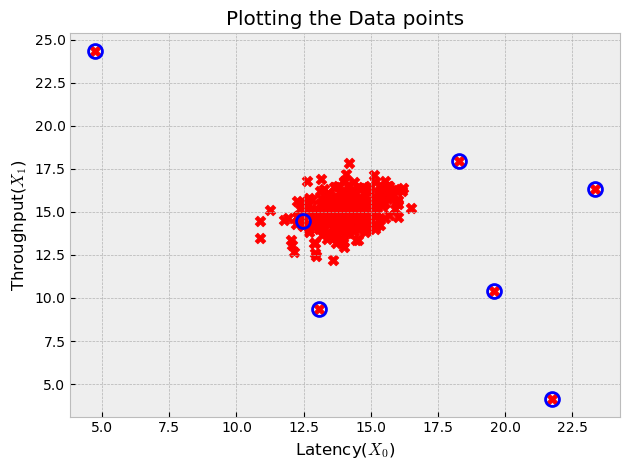

In [42]:
outliers = p_val < epsilon
fig, ax = plt.subplots(1, 1)

ax.scatter(X_train[:, 0], X_train[:, 1], marker="X", c="r", s=60)
ax.plot(X_train[outliers, 0], X_train[outliers, 1], 'ro', c='b', markersize=10, markerfacecolor="none", markeredgewidth=2)
ax.set_xlabel("Latency($X_0$)")
ax.set_ylabel("Throughput($X_1$)")
ax.set_title("Plotting the Data points")
plt.tight_layout()
plt.show()

## Let's compute anamoly for the dataset with various features

In [43]:
# load the dataset
X_train_high, X_val_high, y_val_high = load_data_multi()

In [44]:
print ('The shape of X_train_high is:', X_train_high.shape)
print ('The shape of X_val_high is:', X_val_high.shape)
print ('The shape of y_val_high is: ', y_val_high.shape)

The shape of X_train_high is: (1000, 11)
The shape of X_val_high is: (100, 11)
The shape of y_val_high is:  (100,)


In [62]:
# Apply the same steps to the larger dataset

# Estimate the Gaussian parameters
mu_high, var_high = estimate_gaussian(X_train_high)

# Evaluate the probabilites for the training set
p_high = multivariate_gaussian(X_train_high, mu_high, var_high)

# Evaluate the probabilites for the cross validation set
p_val_high = multivariate_gaussian(X_val_high, mu_high, var_high)

# Find the best threshold
epsilon_high, F1_high = select_threshold(y_val_high, p_val_high)

print('Best epsilon found using cross-validation: %e'% epsilon_high)
print('Best F1 on Cross Validation Set:  %f'% F1_high)
print('# Anomalies found: %d'% sum(p_high < epsilon_high))

Best epsilon found using cross-validation: 1.377229e-18
Best F1 on Cross Validation Set:  0.615385
# Anomalies found: 117


C:\Users\abhis\AppData\Local\Temp\ipykernel_8152\149824424.py:15: RuntimeWarning: invalid value encountered in scalar divide
  prec = tp / (tp + fp)


In [46]:
print(f"The total no. of anomalies in the X_val dataset are: {len(y_val_high[y_val_high == 0])}")

The total no. of anomalies in the X_val dataset are: 90
